<a href="https://colab.research.google.com/github/DanielTusingwire/CUU-Lab-2024/blob/main/internet_traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**#Internet Traffic Data Linear Regressions vs Non-Linear Regression Model: Exponential Growth**



In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:

import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [ ]:
uploadfile = '/content/gdrive/MyDrive/BSE 3 2/Simulation & Modeling Labs/internet_traffic_hist.csv'

df_hist = pd.read_csv(uploadfile)
df_hist.head(11)

,traffic,year
0,100.000000,2005
1,126.933755,2006
2,160.303757,2007
3,203.390603,2008
4,241.292566,2009
5,308.791823,2010
6,379.980659,2011
7,495.840568,2012
8,616.207252,2013
9,752.103483,2014


#**Visualizing the internet volume traffic**
**Note:** According to the [Cisco VNI Forecast](http://www.cisco.com/c/en/us/solutions/collateral/service-provider/visual-networking-index-vni/complete-white-paper-c11-481360.html),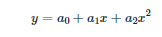 consumer fixed Internet traffic will grow 22% per year from 2015 until 2020. For this lab, the assumption is that the growth rate was the same for the period 2005-2015. Under this assumption, the value of Internet traffic for 2005 is fixed to 100. The DataFrame df_hist contains the evolution of fixed Internet traffic volume until 2015 (plus or minus some year-by-year variation).

Using the matplotlib functions learned so far, visualize the traffic volume evolution year by year.

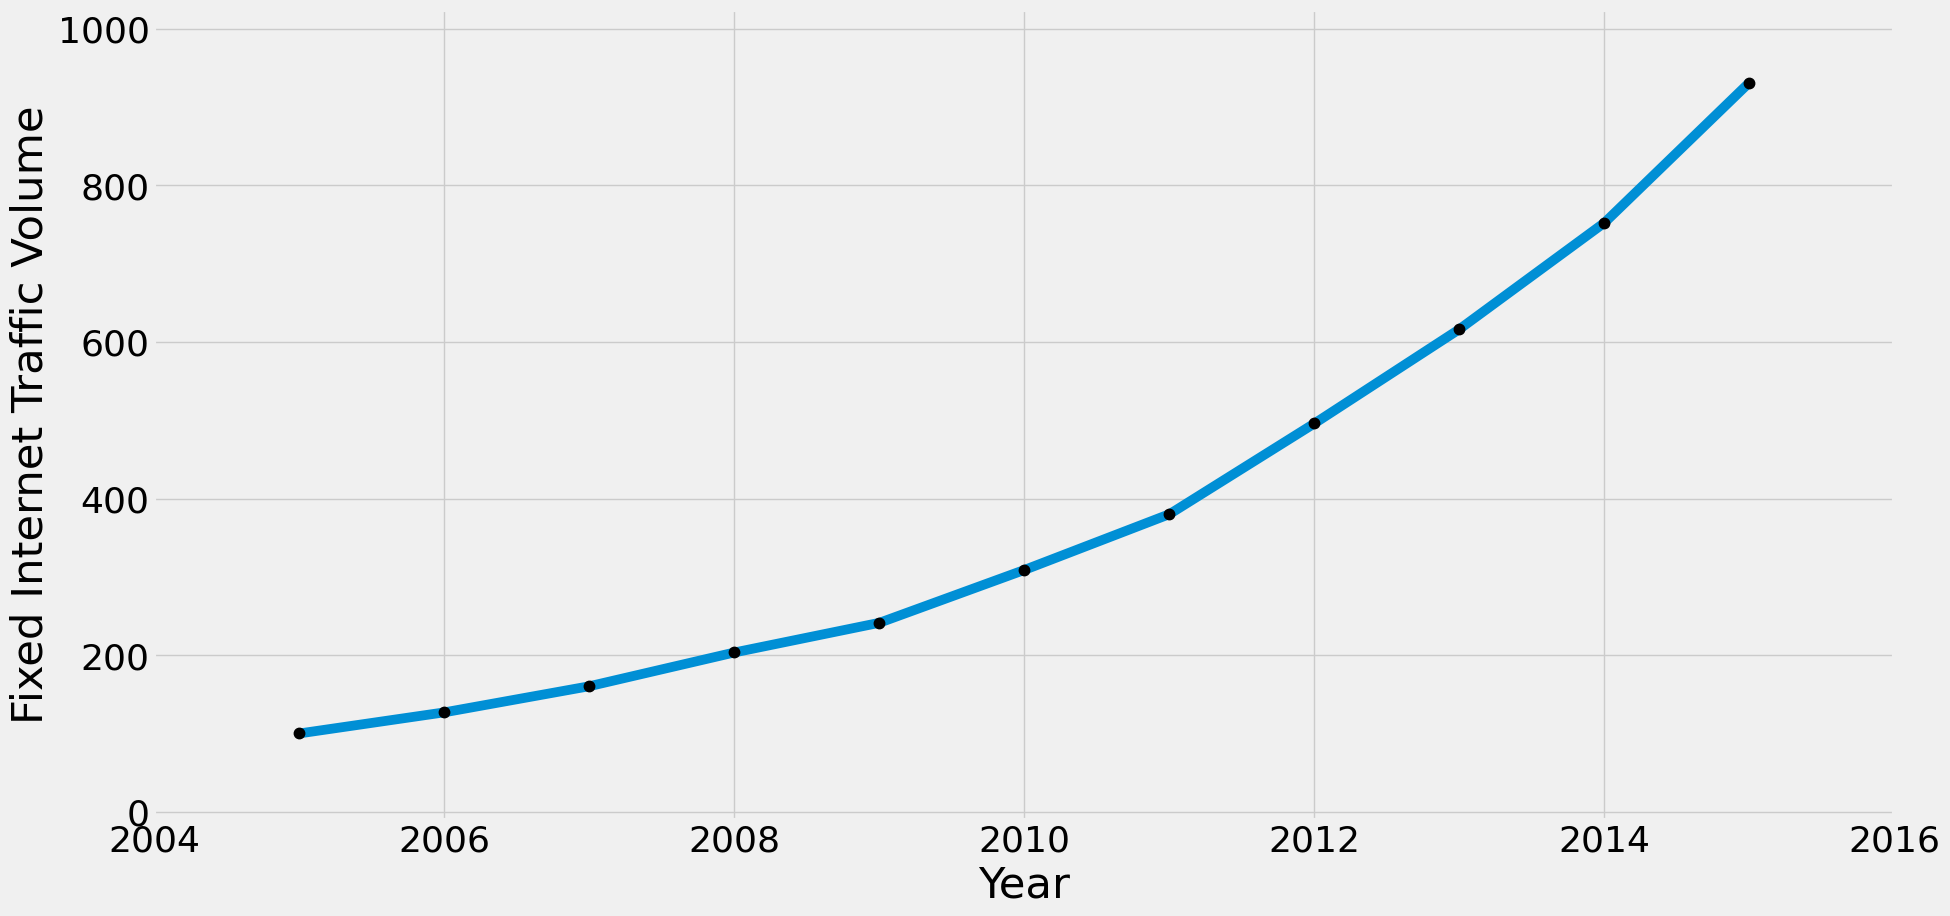

In [ ]:
plt.figure(figsize = (20,10))

# XY Plot of year and traffic
x = df_hist.year
y = df_hist.traffic


plt.plot(x, y, label =' ', linewidth = 7)
plt.plot(x, y,'.k', markersize = 15, label = '')

#Increasing the axis sizes to make the plot more clear
plt.axis([x.iloc[0]-1, x.iloc[-1]+1, y.iloc[0]*-0.1,  y.iloc[-1]*1.1])


plt.xlabel('Year')
plt.ylabel('Fixed Internet Traffic Volume')

# Increasing default font size
plt.rcParams.update({'font.size': 26})
plt.show()

# **Simple Linear Regression: First Order Polynomial**

y = mx + b

where **m** is the slope of line and **b** is y-intercept.

Given the regression model family, the **mean squared error (or MSE)** as a quality of fit metric. The idea is that we want our polynomial function to fit our data as close as possible

**Step 1: Overlay a simple linear regression model over the Internet historical data.**
In Python, the function **polyfit** is used from the numpy library to fit a polynomial regression model of any order and find the parameters that minimize the MSE.

For the first regression exercise, you will use the family of polynomial models with the **order of 1**, in which the internet traffic variable is y
 and the year is x
.

The slope of line is 79.52710966244513.
The y intercept is -159457.12265833947.
The best fit simple linear regression line is 79.52710966244513x + -159457.12265833947.


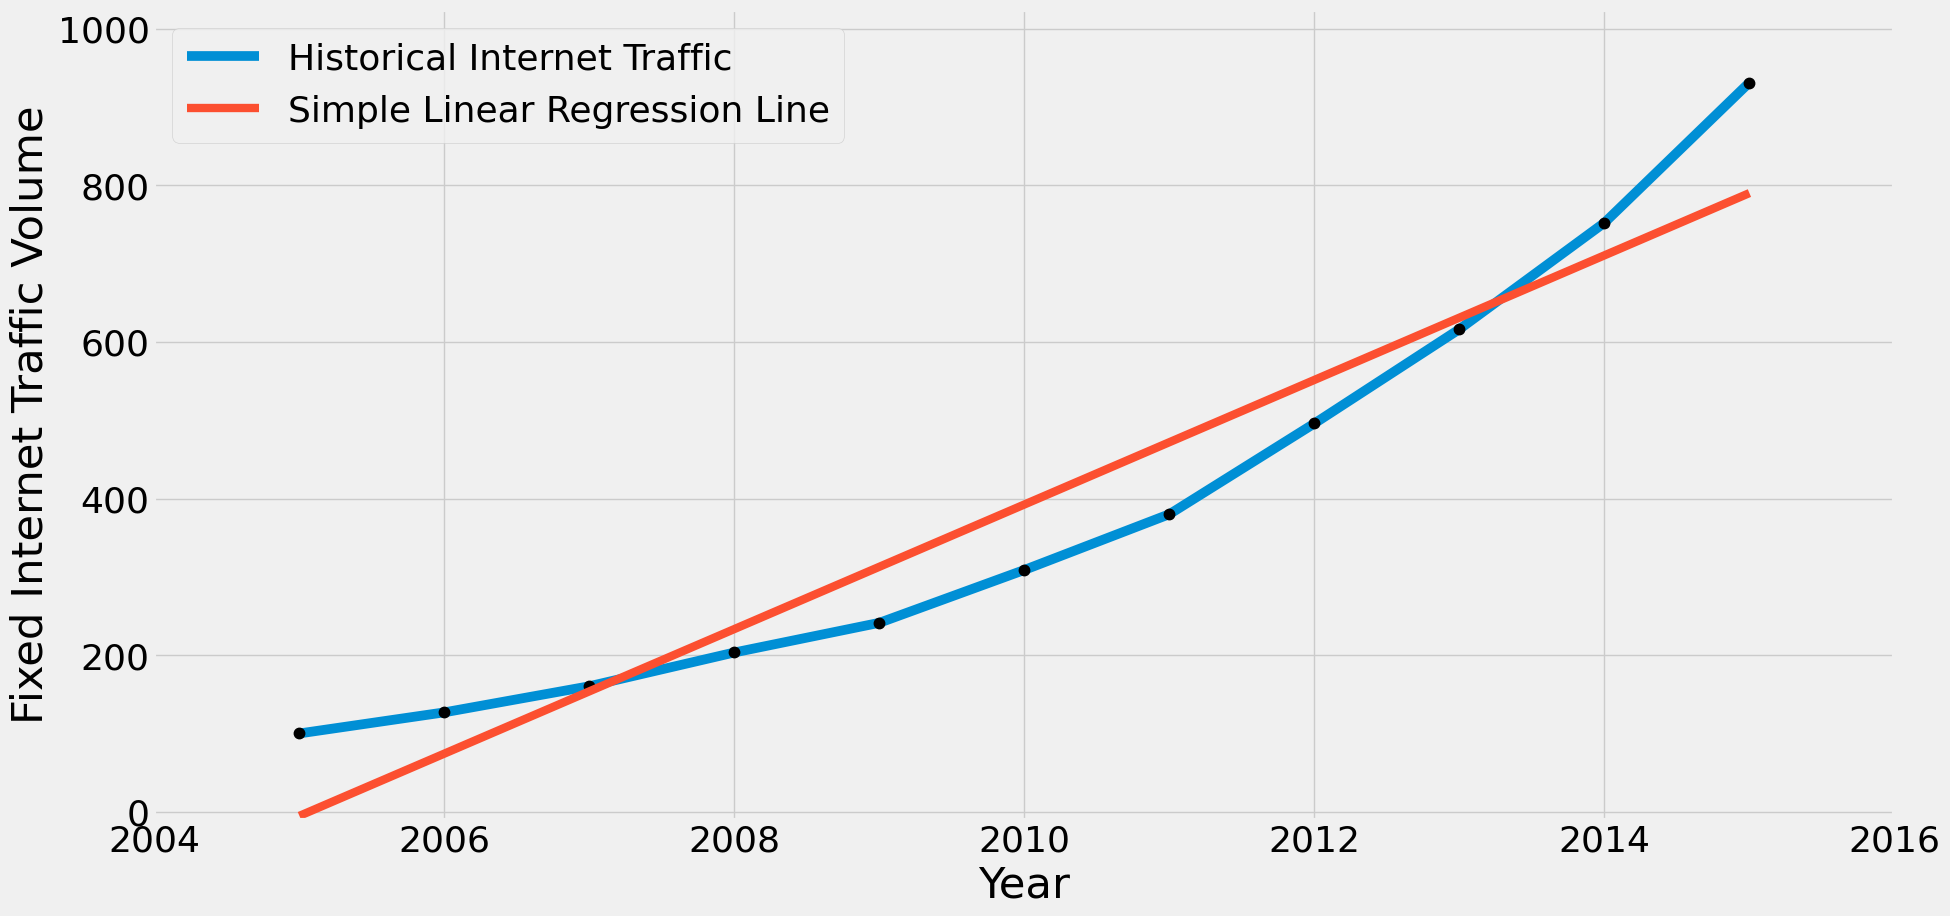

In [ ]:
plt.figure(figsize = (20,10))

order = 1

# XY Plot of year and traffic
x = df_hist.year
y = df_hist.traffic

m, b = np.polyfit(x,y,order)

plt.plot(x, y, label = 'Historical Internet Traffic', linewidth = 7)
plt.plot(x, y,'.k', markersize = 15, label ='')
plt.plot(x, m*x + b, '-', label = 'Simple Linear Regression Line', linewidth = 6)

print ('The slope of line is {}.'.format(m))
print ('The y intercept is {}.'.format(b))
print ('The best fit simple linear regression line is {}x + {}.'.format(m,b))


#Increase sligthly the axis sizes to make the plot more clear
plt.axis([x.iloc[0]-1, x.iloc[-1]+1, y.iloc[0]*-0.1, y.iloc[-1]*1.1])

# Add axis labels
plt.xlabel('Year')
plt.ylabel('Fixed Internet Traffic Volume')
plt.legend(loc = 'upper left')


# Increase default font size
plt.rcParams.update({'font.size': 26})
plt.show()

# **Linear Regression: Higher Order Polynomials**
The simple linear regression plot shows that the simple regression linear model is not a suitable model to project the Internet traffic in 2020.

You will fit a second and third order polynomial regression model to the Internet historical traffic data and store the errors and the MSE for each model in a list. It will be used to compare regression models later in the lab.

A formula for the second order:




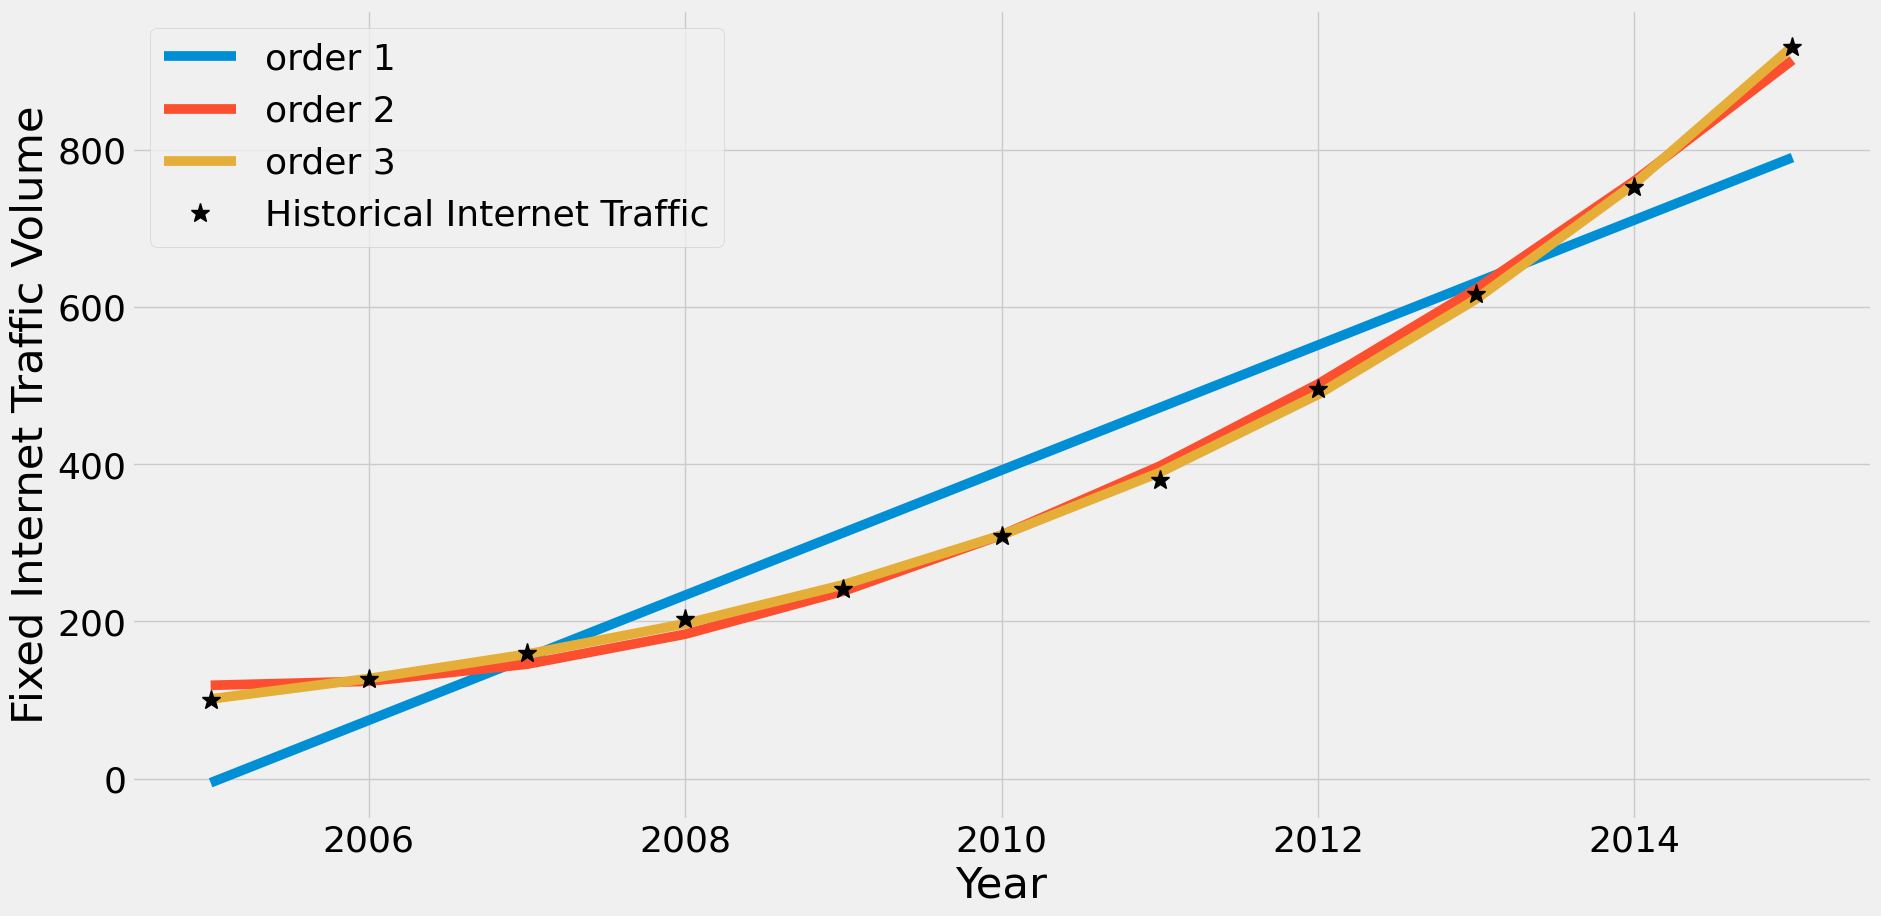

In [ ]:
models = []       # to store polynomial model parameters (list of poly1d objects)
errors_hist = []  # to store the absolute errors for each point (2005-2015) and for each model (list of numpy arrays )
mse_hist = []     # to store the MSE for each model (list of numpy floats)

#Try polynomial models with increasing order
for order in range(1,4):
    # Fit polynomial model
    p = (np.poly1d(np.polyfit(x, y, order)))
    models.append(p)

plt.figure(figsize = (20,10))

# Visualize polynomial models fit
for model in models[0:3]:
    plt.plot(x, model(x), label = 'order ' + str(len(model)), linewidth = 7)

plt.plot(x, y, '*k', markersize = 14, label = 'Historical Internet Traffic', linewidth = 7)
plt.legend(loc = 'upper left')

# Add axis labels
plt.xlabel('Year')
plt.ylabel('Fixed Internet Traffic Volume')

plt.show()

# **Calculating the Errors**

Comparing the errors and visualize the fit for the different regression models by errors
**Note:** Given the regression model family, **the mean squared error (or MSE)** as a quality of fit metric. The idea is that we want our polynomial function to fit our data as close as possible



In [ ]:
models = []       # to store polynomial model parameters (list of poly1d objects)
errors_hist = []  # to store the absolute errors for each point (2005-2015) and for each model (list of numpy arrays )
mse_hist = []     # to store the MSE for each model (list of numpy floats)

#Try polynomial models with increasing order
for order in range(1,4):
    # Fit polynomial model
    p = (np.poly1d(np.polyfit(x, y, order)))
    models.append(p)

    e = np.abs(y-p(x))        # absolute error
    mse = np.sum(e**2)/len(df_hist) # mse

    errors_hist.append(e)   #Store the absolute errors
    mse_hist.append(mse) # Store the mse

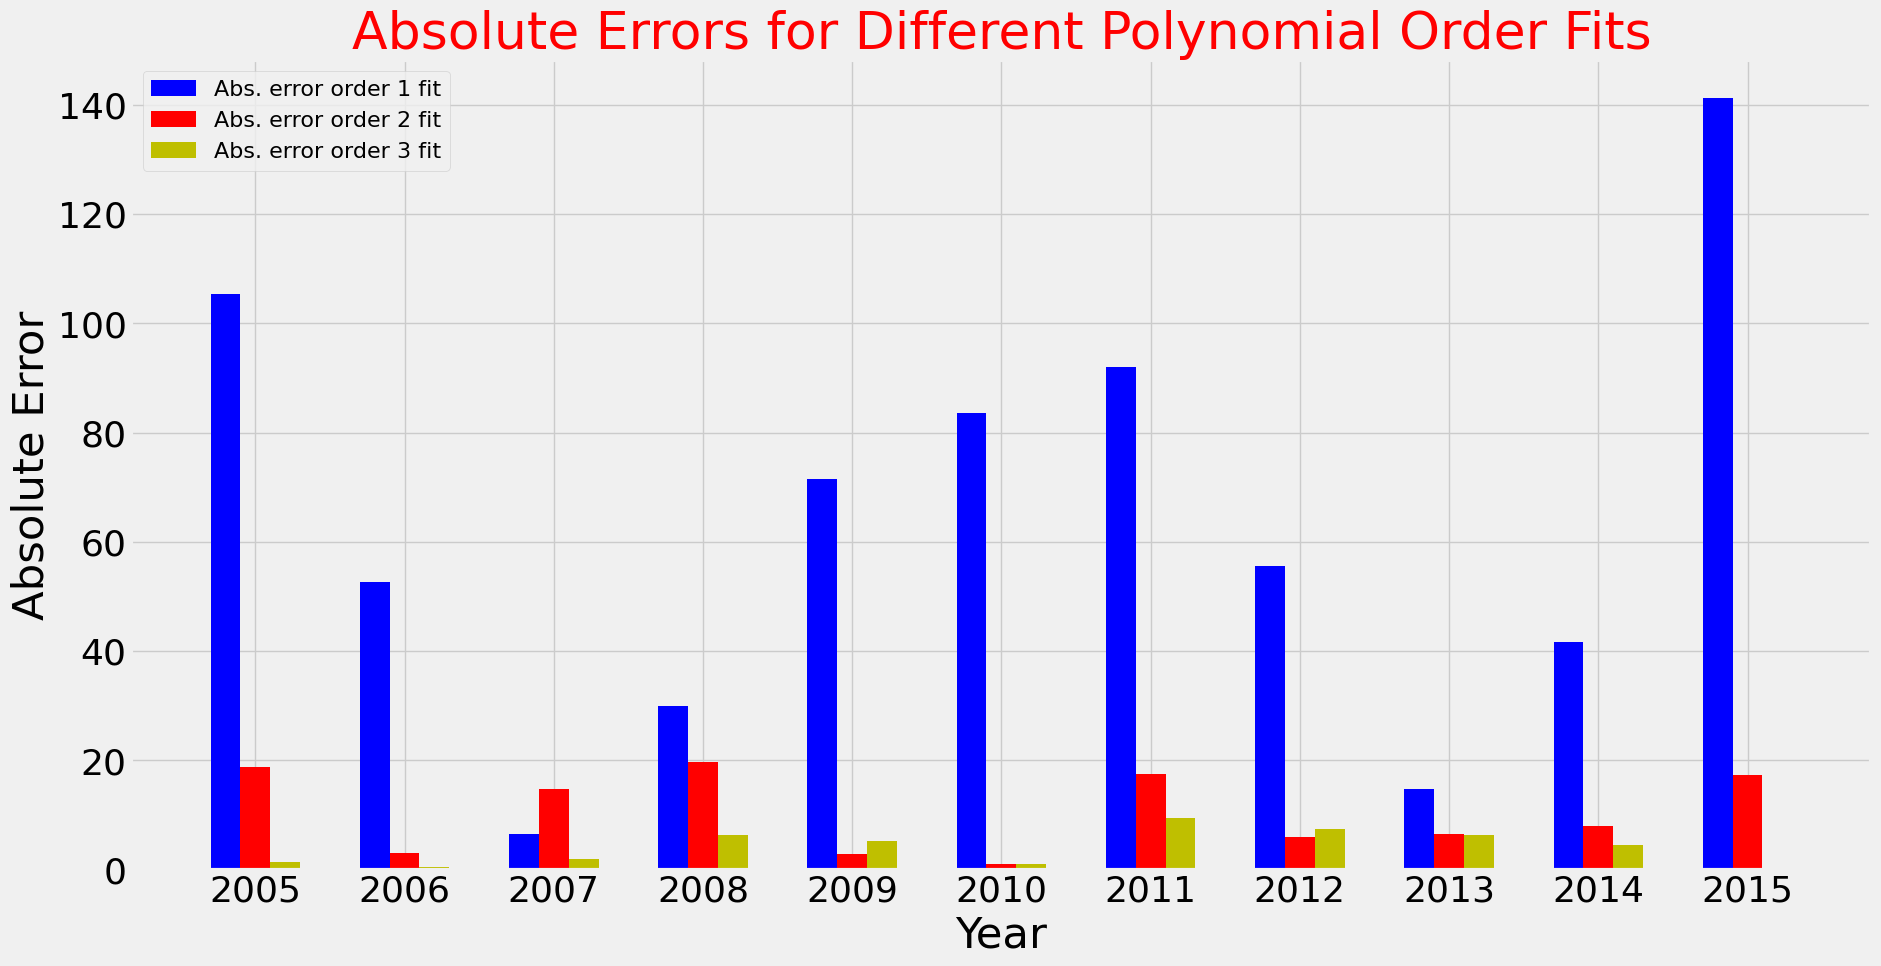

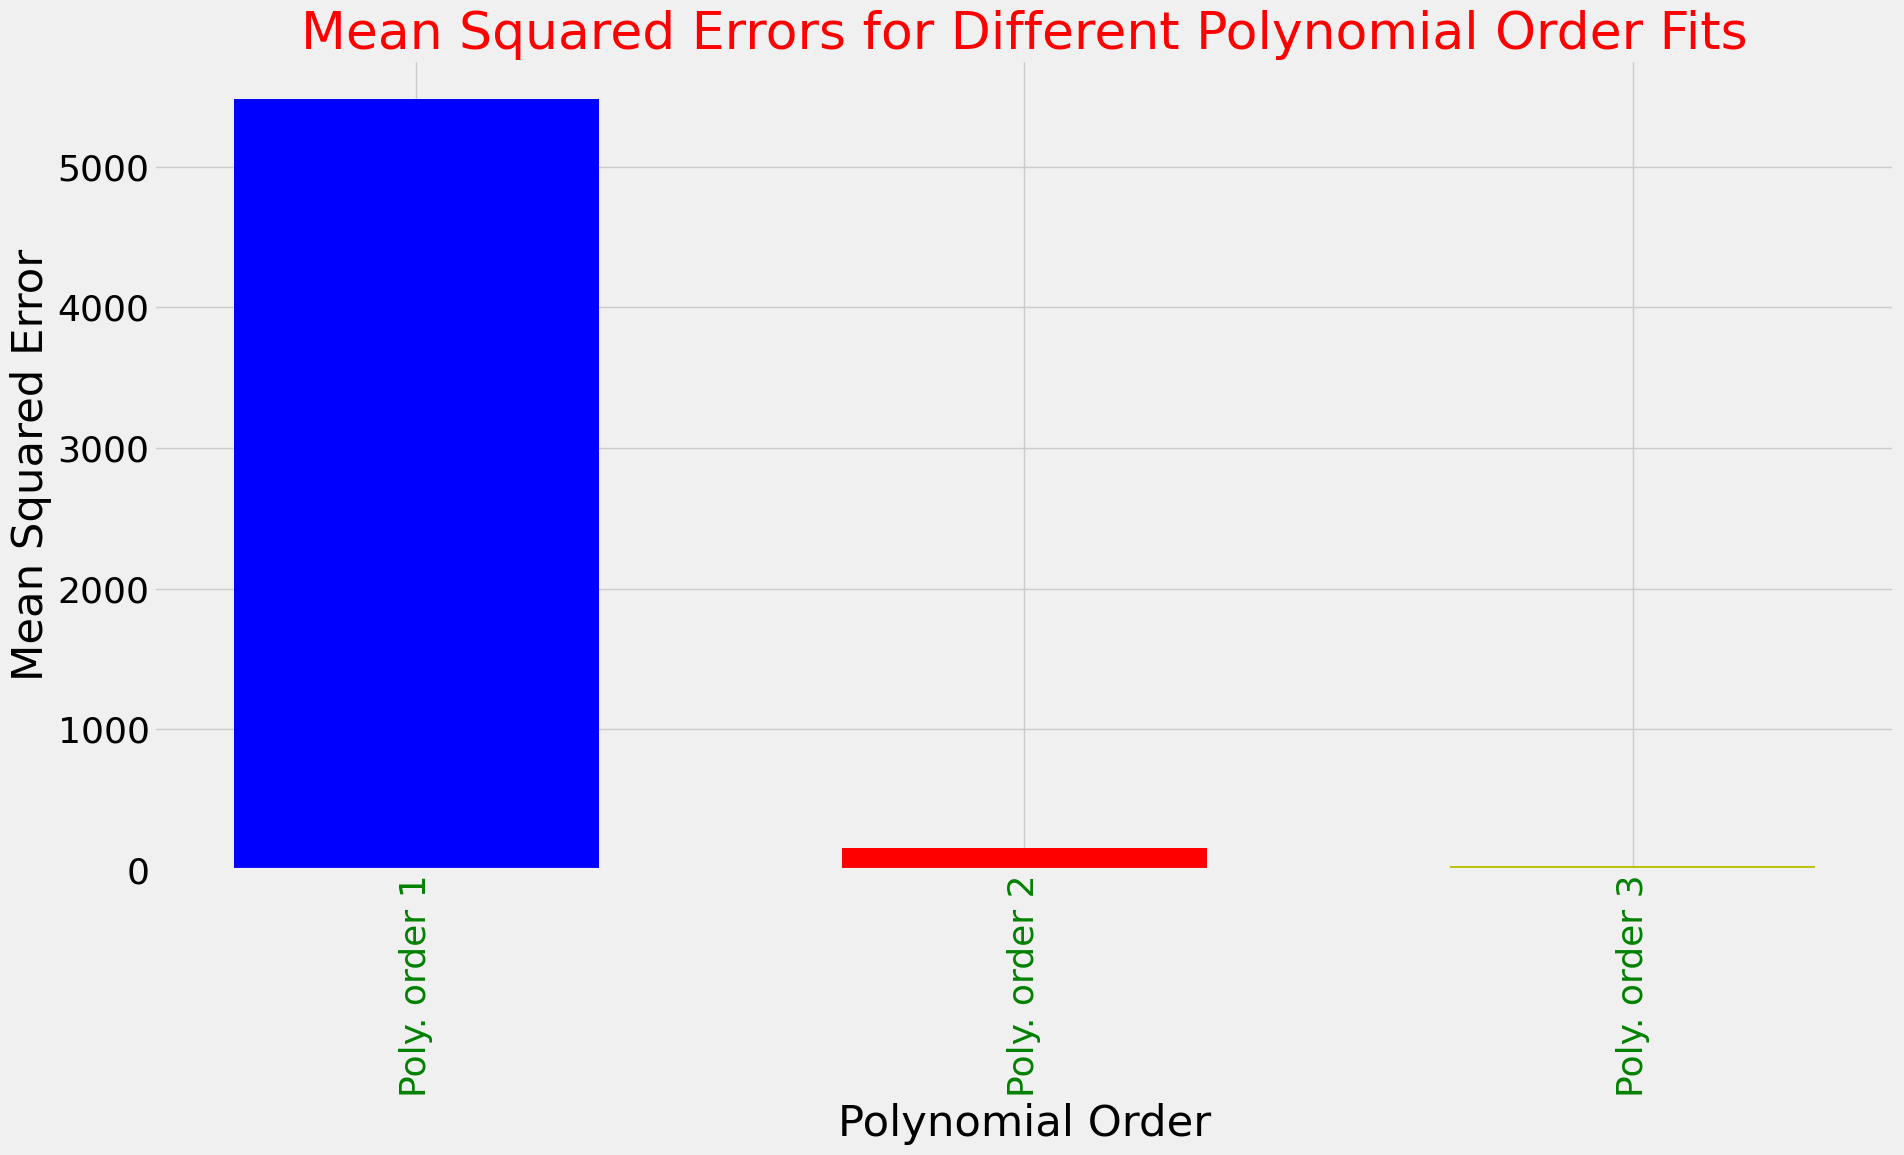

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data for absolute errors
x = df_hist['year']
width = 0.2

fig, ax = plt.subplots(figsize=(20, 10))

p1 = ax.bar(x - width, errors_hist[0], width, color='b', label='Abs. error order 1 fit')
p2 = ax.bar(x, errors_hist[1], width, color='r', label='Abs. error order 2 fit')
p3 = ax.bar(x + width, errors_hist[2], width, color='y', label='Abs. error order 3 fit')

# Beautify the bar graph
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.legend(loc='upper left', fontsize=16)
ax.set_xlabel('Year')
ax.set_ylabel('Absolute Error')
ax.set_title('Absolute Errors for Different Polynomial Order Fits', color = 'r')
plt.show()

# Data for mean squared errors (MSE)
x = np.array([0, 1, 2])
width = 0.6

fig, ax = plt.subplots(figsize=(20, 10))

p1 = ax.bar(x[0], mse_hist[0], width, color='b', label='Pred. error order 1 fit')
p2 = ax.bar(x[1], mse_hist[1], width, color='r', label='Pred. error order 2 fit')
p3 = ax.bar(x[2], mse_hist[2], width, color='y', label='Pred. error order 3 fit')

ax.set_xticks(x)
ax.set_xticklabels(['Poly. order 1', 'Poly. order 2', 'Poly. order 3'], rotation = 90, color = 'g')
ax.set_xlabel('Polynomial Order')
ax.set_ylabel('Mean Squared Error')
ax.set_title('Mean Squared Errors for Different Polynomial Order Fits', color ='r')
plt.show()


# **Observation from the above graphs**
From the plot above, it appears that the third polynomial order has the least amount of errors, and the error between the 2nd and 3rd orders is negligible. This suggests that the third polynomial is the best fit for the orders used in this lab at this time.


In [ ]:
order = 3

x = df_hist.year.values      # regressor
y = df_hist.traffic.values   # regressand

# Fit the model, return the polynomial parameter values in a numpy array such that
# y = p[0]*x**order + p[1]*x*(order-1) ...

p_array = np.polyfit(x,y,order)

print(type(p_array), p_array)

# poly1d is a convenience class, used to encapsulate “natural” operations on polynomials
# so that said operations may take on their customary form in code

# wrap the p_array in a poly1 object
p = np.poly1d(p_array)

print(type(p), p)

# use the poly1d object to evaluate the value of the polynomial in a specific point
print('The value of the polynomial for x = 2020 is : {} '.format(p(2020)))

# compute the absolute error for each value of x and the MSE error for the estimated polynomial model
e = np.abs(y-p(x))
mse = np.sum(e**2)/len(x)

print('The estimated polynomial parameters are: {}'.format(p))
print('The errors for each value of x, given the estimated polynomial parameters are: \n {}'.format(e))
print('The MSE is :{}'.format(mse))

<class 'numpy.ndarray'> [ 4.83129404e-01 -2.90500578e+03  5.82252085e+06 -3.89005387e+09]
<class 'numpy.poly1d'>         3        2
0.4831 x - 2905 x + 5.823e+06 x - 3.89e+09
The value of the polynomial for x = 2020 is : 2328.5784521102905 
The estimated polynomial parameters are:         3        2
0.4831 x - 2905 x + 5.823e+06 x - 3.89e+09
The errors for each value of x, given the estimated polynomial parameters are: 
 [1.30743027 0.39125264 2.02722693 6.32983208 5.28394403 0.93069802
 9.41692212 7.34010081 6.27729748 4.48133933 0.16291521]
The MSE is :25.17218620372407


# **Part 6: Non-Linear Regression Model: Exponential Growth**

In the case of the Internet traffic data, we know that the true underlying mathematical relathionship between traffic and the year is an exponential growth. We can therefore use that as a model, and estimate the best fitting parameters
 a anf f
. However, the exponential growth is a non-linear function. This makes the computation of the optimal parameters a much harder problem. It is not possible to minimize the MSE using a simple closed-form formula, but an iterative algorithm is necessary, which might not be able to converge to the optimal solution. Non-linear regression is a topic in itself.

In [ ]:
# First, define the regression model function, in this case, we'll choose an exponential of the form y= a*(b^(x))
def my_exp_func(x, a, b):
    return a * (b ** x)

x = np.arange(2016-2005)    # the regressor is not the year in itself, but the number of years from 2005
y = df_hist.traffic.values  # regressand

# use curve_fit to find the exponential parameters vector p. cov expresses the confidence of the
# algorithm on the estimated parameters
p, cov = curve_fit(my_exp_func, x, y)
e = np.abs(y - my_exp_func(x, *p))
mse = np.sum(e**2)/len(df_hist)

print('The estimated exponential parameters are: {}'.format(p))
print('The errors for each value of x, given the estimated exponential parameters are: \n {}'.format(e))
print('The MSE is :{}'.format(mse))

models.append(p)

errors_hist.append(e) # Store the absolute error
mse_hist.append(mse)

The estimated exponential parameters are: [103.37820145   1.24678465]
The errors for each value of x, given the estimated exponential parameters are: 
 [ 3.37820145  1.95659903  0.39475806  3.0341622   8.50876829  2.65664478
  8.32850905 11.70265948 12.59154094  0.47531785  7.10276496]
The MSE is :47.2361636667875


# **Comparing Models**
Comparing the errors and visualize the fit for the different regression models.

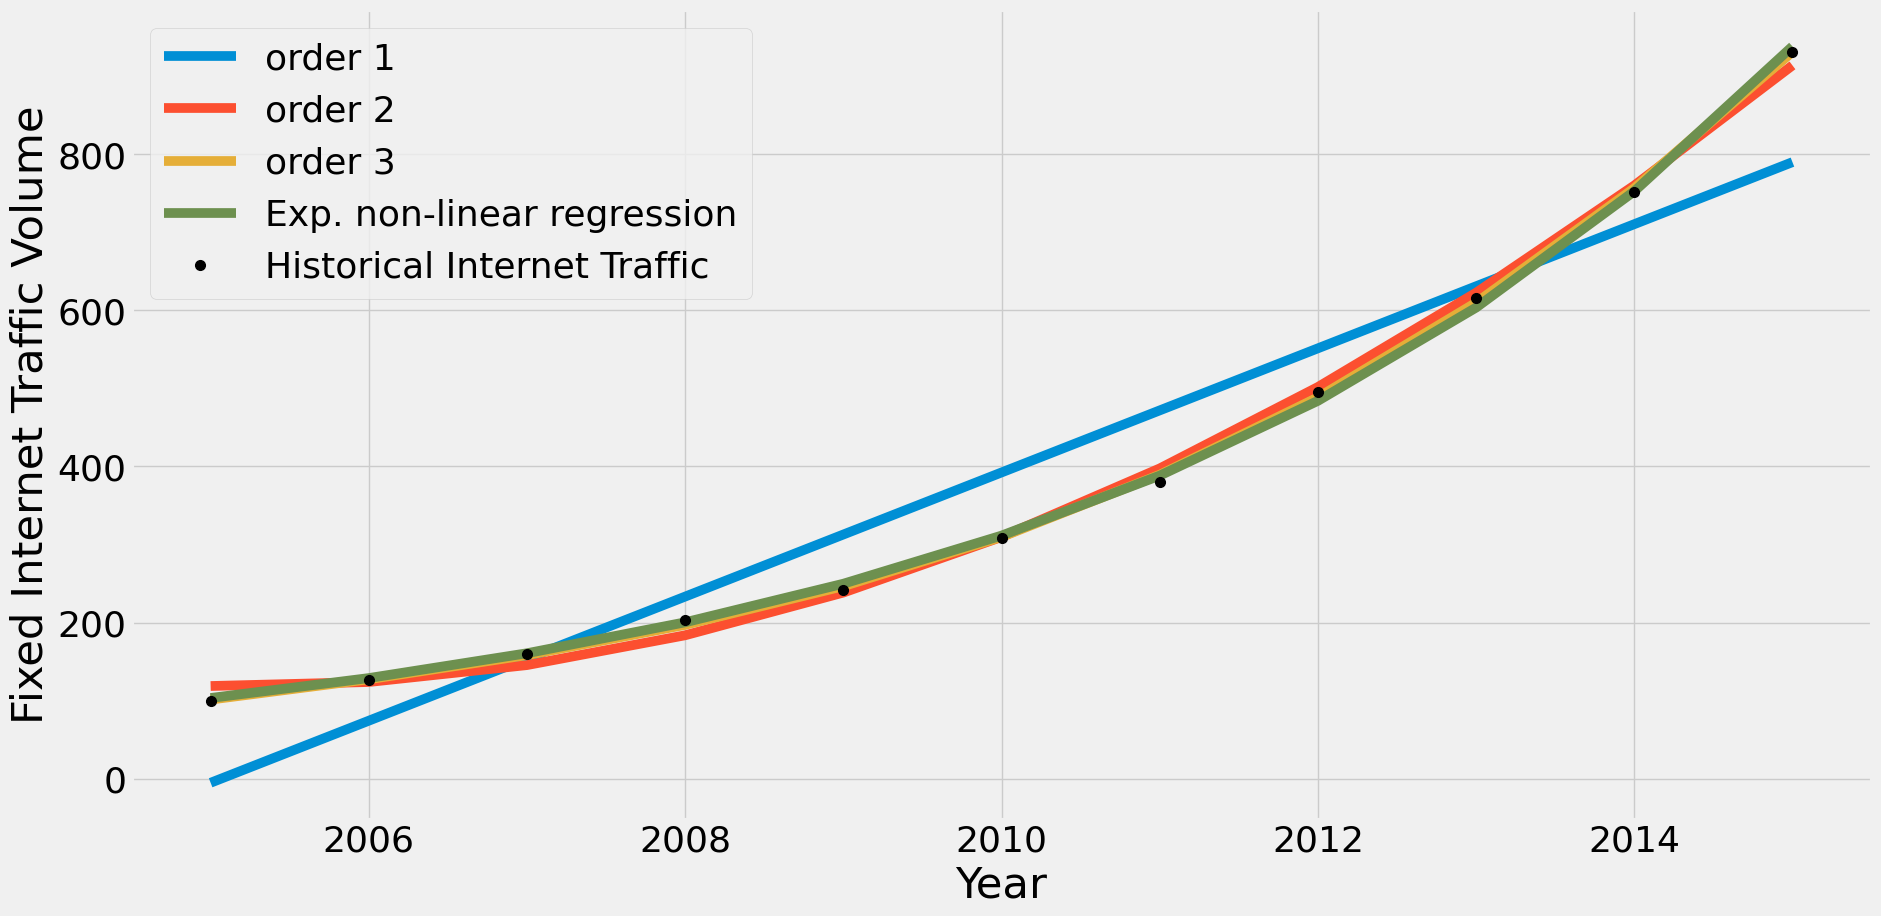

In [ ]:
plt.figure(figsize = (20,10))

# Visualize polynomial models fit
for model in models[0:-1]:

    x = df_hist.year.values
    y = df_hist.traffic.values
    plt.plot(x, model(x), label = 'order ' + str(len(model)), linewidth = 7)

# Visualize exponenetial model fit
x = np.arange(2016-2005)    # the regressor is not the year in itself, but the number of years from 2005
plt.plot(df_hist.year.values, my_exp_func(x, *models[-1]), label = 'Exp. non-linear regression', linewidth = 7)

plt.plot(df_hist.year, df_hist.traffic, '.k', markersize = 14, label='Historical Internet Traffic')
plt.legend(loc = 'upper left')

# Add axis labels
plt.xlabel('Year')
plt.ylabel('Fixed Internet Traffic Volume')
plt.show()

# **Observation**
For the selected range of year, the difference between a 2nd or 3rd order polynomial regression model and the exponential one is negligible.

 Let's visualize the actual errors.

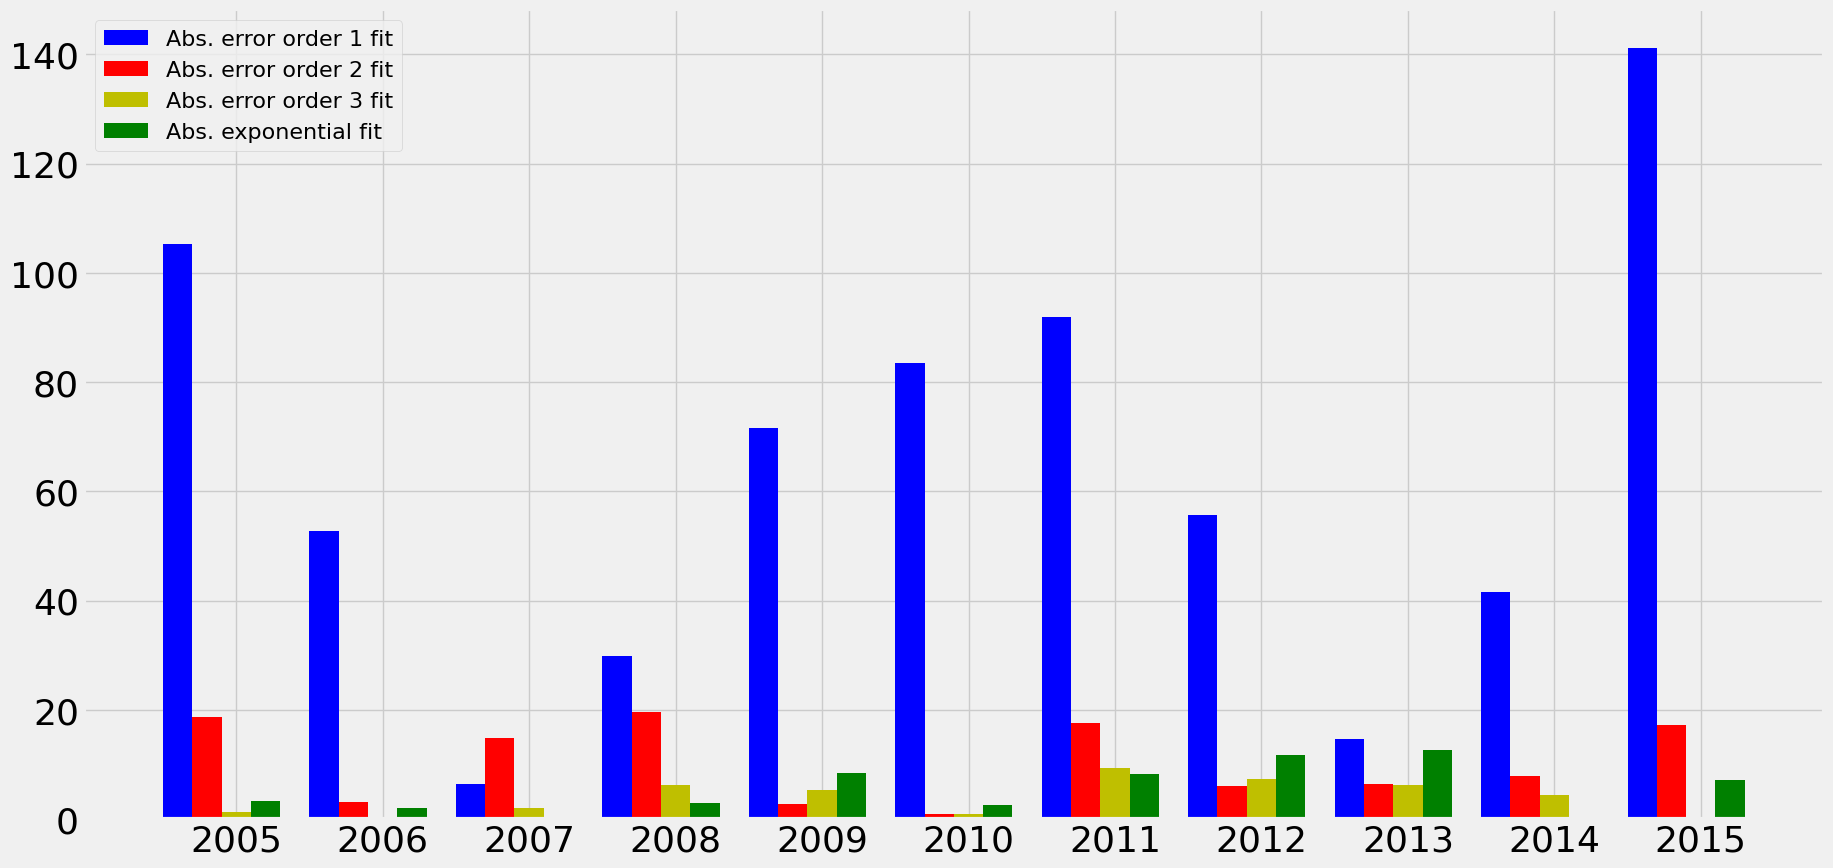

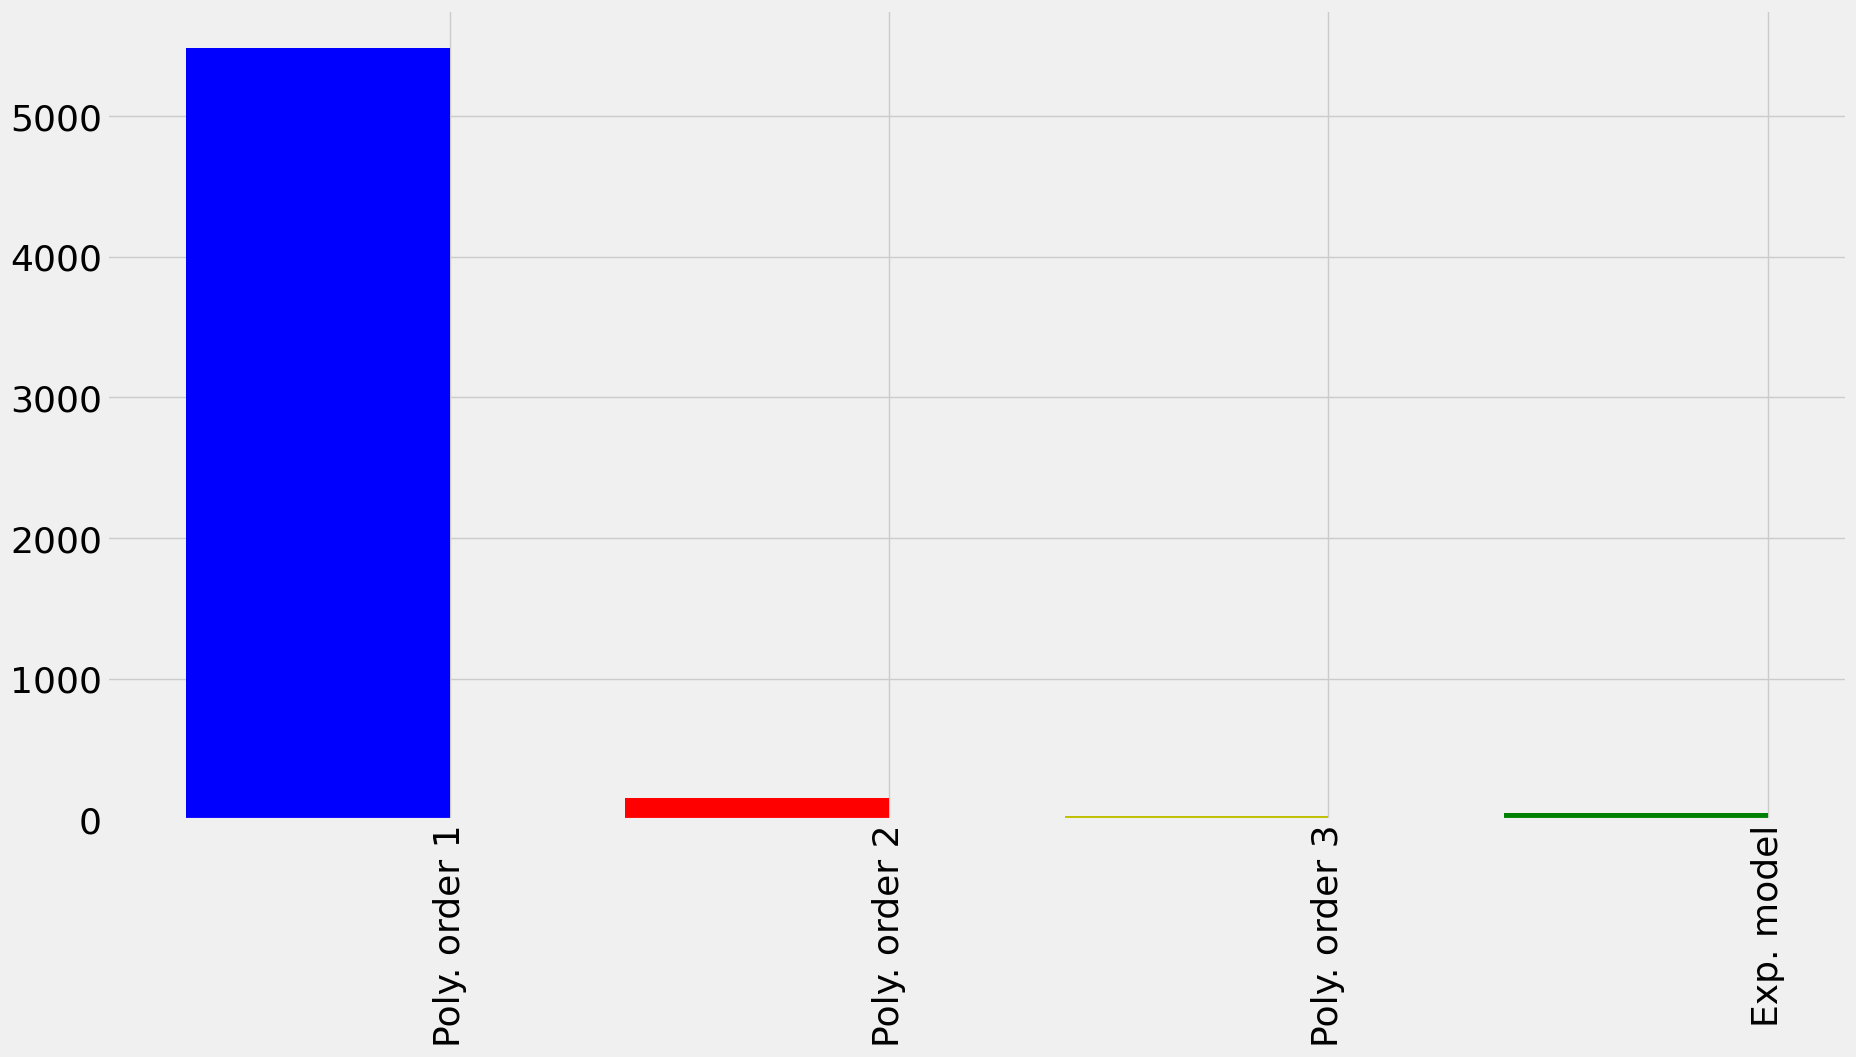

In [ ]:
# Visualize fit error for each year

x = df_hist.year
width = 0.2   #size of the bar

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

p1 = ax.bar( x, errors_hist[0], width, color = 'b', label = 'Abs. error order 1 fit')
p2 = ax.bar( x + width, errors_hist[1], width, color = 'r', label = 'Abs. error order 2 fit')
p3 = ax.bar( x + 2*width, errors_hist[2], width, color = 'y', label = 'Abs. error order 3 fit')
p4 = ax.bar( x + 3*width, errors_hist[3], width, color = 'g', label = 'Abs. exponential fit')

# "Prettyfy" the bar graph
ax.set_xticks(x+2*width)
ax.set_xticklabels(x)
plt.legend(loc = 'upper left', fontsize =16)
plt.show()

#Visualise MSE for each model
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

x = np.array([0,1,2,3])
width = .6   #size of the bar

p1 = ax.bar( x[0], mse_hist[0], width, color = 'b', label = 'pred. error order 1 fit')
p2 = ax.bar( x[1], mse_hist[1], width, color = 'r', label = 'pred. error order 2 fit')
p3 = ax.bar( x[2], mse_hist[2], width, color = 'y', label = 'pred. error order 3 fit')
p4 = ax.bar( x[3], mse_hist[3], width, color = 'g', label = 'pred. exponential fit')

ax.set_xticks(x+width/2)
ax.set_xticklabels(['Poly. order 1', 'Poly. order 2', 'Poly. order 3', 'Exp. model' ], rotation=90)
plt.show()

# **Observationt**
From the last plot, it seems that a third order polynomial, while not being the true model, fits better the traffic measurements in the observed range. But how well will this model generalize outside of this range (e.g., if we want to use this to make predictions about the future Internet traffic volume) ?



**Step 1: Load and visualize projected Internet traffic volume.**

In this part, you will look at the projected values for the fixed Internet traffic volume. Assuming the same growth rate of the period 2005-2015, data is generated and stored in the dataset **internet_traffic_proj.csv**. Load its content in a **DataFrame** named df_proj and visualize the first few rows.

In [ ]:
filename = '/content/gdrive/MyDrive/BSE 3 2/Simulation & Modeling Labs/internet_traffic_proj.csv'
df_proj = pd.read_csv(filename)
df_proj.head()

,traffic,year
0,931.200929,2015
1,1266.783122,2016
2,1427.662376,2017
3,1749.671543,2018
4,2281.869542,2019


**Compare linear and nonlinear model prediction errors.**

Merge the df_proj and the df_hist DataFrames, and visualize how the previously fitted regression model behaves in predicting future values.

In [ ]:
df = pd.concat([df_hist, df_proj]).reset_index()
df.drop('index', axis=1, inplace=True)
df = df.drop_duplicates() #The 2015 value is found in both the df_hist and df_proj df
df.head(20)

,traffic,year
0,100.000000,2005
1,126.933755,2006
2,160.303757,2007
3,203.390603,2008
4,241.292566,2009
5,308.791823,2010
6,379.980659,2011
7,495.840568,2012
8,616.207252,2013
9,752.103483,2014


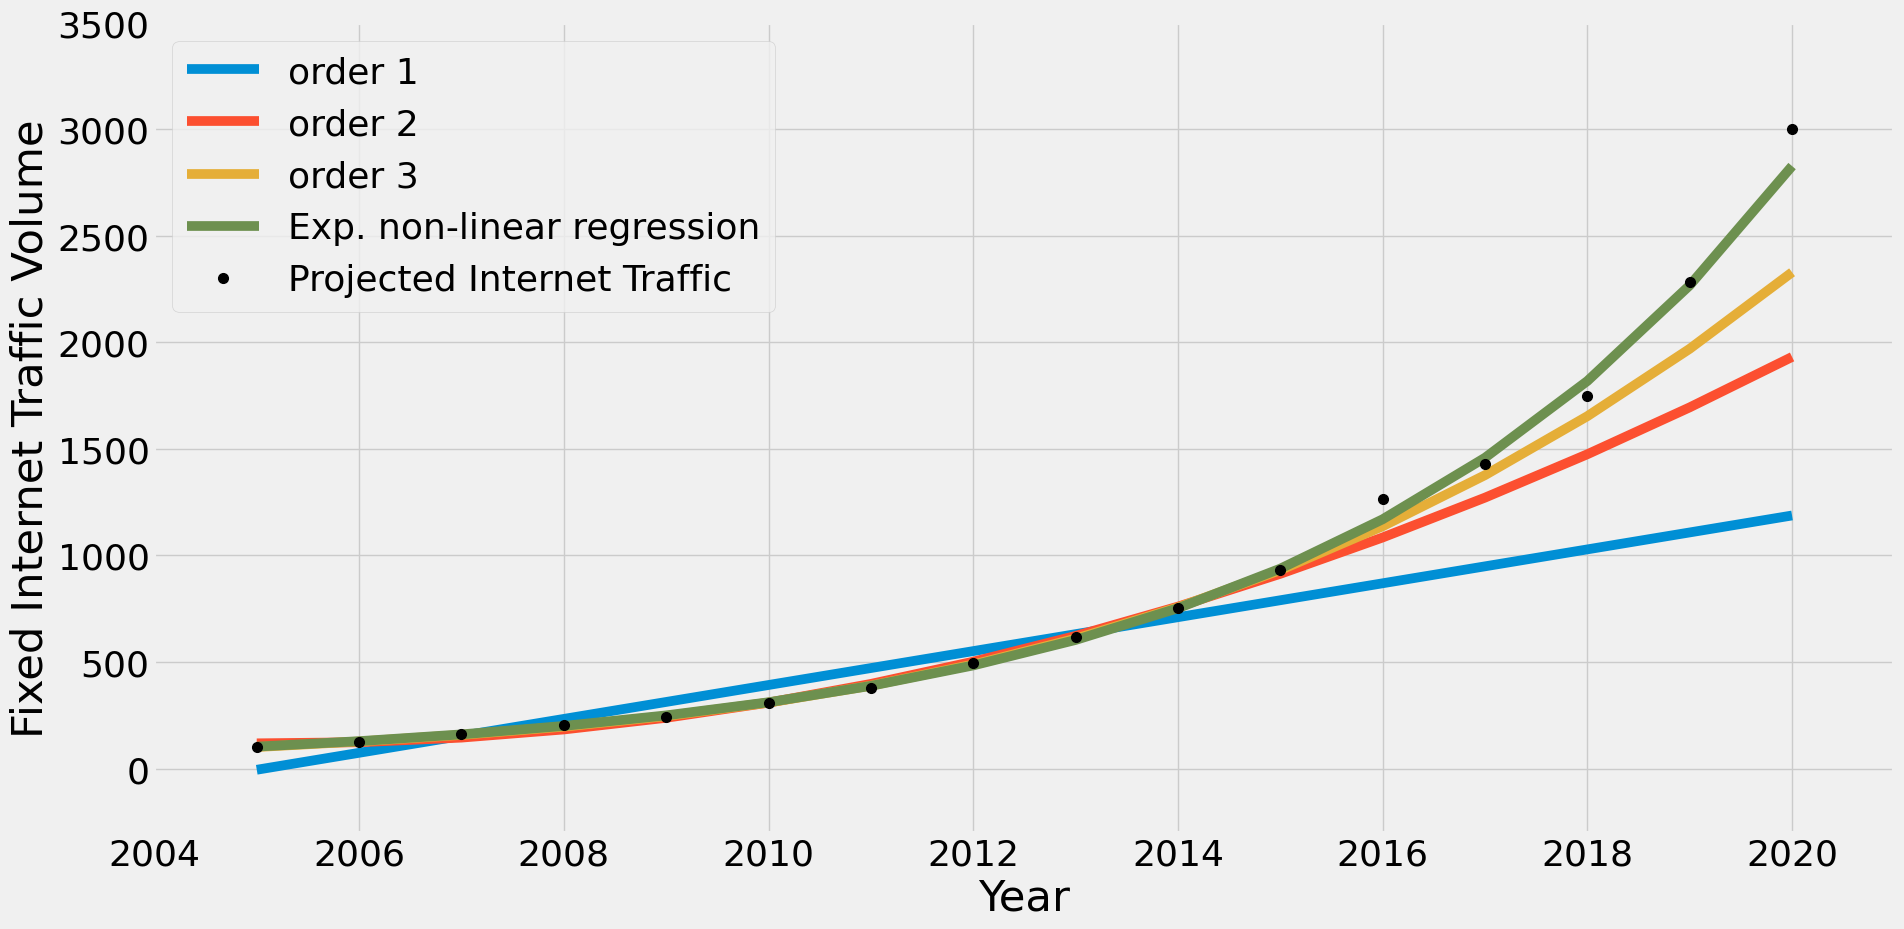

In [ ]:
plt.figure(figsize = (20,10))

errors_all = []
mse_all = []

for model in models[0:-1]:

    # Visualize polynomial model fit
    x = df.year.values
    y = df.traffic.values
    plt.plot(x, model(x), label = 'order ' + str(len(model)), linewidth = 7)

    # error and mse for polynomial models
    pred_y = model(x)
    e = np.abs(y - pred_y)
    errors_all.append(e)   #Store the absolute errors
    mse_all.append(np.sum(e**2)/len(df)) # Store the mse


# Visualize exponential model fit
x = np.arange(2021-2005)    # the regressor is not the year in itself, but the number of years from 2005
pred_y = my_exp_func(x, *models[-1])
plt.plot(df.year.values, pred_y, label = 'Exp. non-linear regression', linewidth = 7)

# errors and mse for exponential model
e = np.abs(y - pred_y)
errors_all.append(e)   #Store the absolute errors
mse_all.append(np.sum(e**2)/len(df)) # Store the mse

plt.plot(df.year, df.traffic, '.k', markersize = 14, label='Projected Internet Traffic')
plt.legend(loc = 'upper left')

# Add axis labels
plt.xlabel('Year')
plt.ylabel('Fixed Internet Traffic Volume')
plt.axis([2004,2021, -300, 3500])
plt.show()

In [ ]:
aishakharundah@gmail.com

# **Observation**
### In this case, it appears that **the third order model** failed to accurately predict future values as the years progressed, while t**he exponential model** demonstrated better predictive performance. This suggests that **the exponential model** may be more suitable for forecasting future values over time. However, it's important to consider factors such as model fit, prediction accuracy, and underlying assumptions when comparing different models for forecasting purposes.
